In [1]:
import arlpy.uwapm as pm
import numpy as np

In [2]:
x = np.linspace(-5000, 5000, 1080)
z = np.linspace(0, 500,  720)
depth = 450

In [3]:
ssp_depth = np.array([10, 150, 200, 250])
ssp       = np.array([1400, 1400, 1400, 1400])

In [4]:
tx_freq  = 700
tx_depth = 10

In [5]:
env = pm.make_env2d(
                
        pad_inputData   = True, 
        name            = 'Example',

        # BELLHOP/KRAKEN attn
        volume_attn     = None,
        mode            = 'coherent',
        
        # ALL: Receiver positoins
        rx_range        = x,                                                   # m
        rx_depth        = z,                                                   # m
        
        # OALIB: Top boundary condition
        top_boundary    = 'vacuum',
        
        # ALL: Sound speed profiles
        ssp_depth       = ssp_depth,                                           # m
        ssp             = ssp,                                                 # m/s

        # OALIB: Sound speed interpolation
        ssp_interp      = 'c-linear',
        
        # ALL: Source freq and depth
        tx_freq         = tx_freq,                                             # Hz
        tx_depth        = tx_depth,                                            # m

        # ALL: Bottom interface
        bot_interface   = np.column_stack((0, depth)),                 # m
                                                        
        # OALIB: Bottom boundary 
        bot_boundary    = 'acousto-elastic',
        attn_unit       = 'dB/wavelength',
        bot_roughness   = 0.2,                                                 # m (rms)
        bot_density     = 2.75,                                                # g/cm3
        bot_PwaveSpeed  = 6000,                                                # m/s 
        bot_SwaveSpeed  = 3500,                                                # m/s 
        bot_PwaveAttn   = 0.02,                                                # dB/wavelength 
        bot_SwaveAttn   = 0.02,                                                # dB/wavelength 
        )

In [6]:
KRAKEN = pm.KRAKEN(env, cp=True)

Content of the file: '/tmp/tmpr7i44f8l.env'.
'Example'
700.000000
1
'CVW'
0 0.0 505.505000
0.000000 1400.000000 0.0 1.030000 0.0 0.0 /
10.000000 1400.000000 /
150.000000 1400.000000 /
200.000000 1400.000000 /
250.000000 1400.000000 /
505.505000 1400.000000 /
'A' 0.200000
450.000000 6000.000000 3500.000000 2.750000 0.020000 0.020000
0.000000 999999999.000000
5.050000
1
10.000000 /
720
0.000000 500.000000 /
1080
-5.000000 5.000000 /



(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[KRAKEN - Modes] First 3 Shapes'}, ylabel='Depth [m]'>)

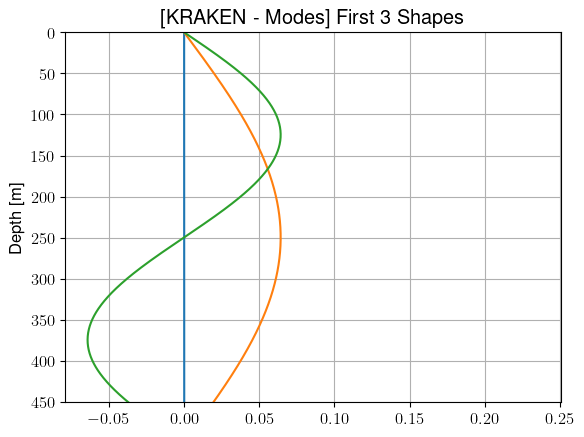

In [7]:
KRAKEN.compute_modes(debug=True)
KRAKEN.plot_modes(3)

In [8]:
tl = KRAKEN.compute_transmission_loss(debug=True)

Content of the file: '/tmp/tmp1nq6dxux.env'.
'Example'
700.000000
1
'CVW'
0 0.0 505.505000
0.000000 1400.000000 0.0 1.030000 0.0 0.0 /
10.000000 1400.000000 /
150.000000 1400.000000 /
200.000000 1400.000000 /
250.000000 1400.000000 /
505.505000 1400.000000 /
'A' 0.200000
450.000000 6000.000000 3500.000000 2.750000 0.020000 0.020000
0.000000 999999999.000000
5.050000
1
10.000000 /
720
0.000000 500.000000 /
1080
-5.000000 5.000000 /

Content of the file: '/tmp/tmp1nq6dxux.flp'.
/
'RAOC'
9999
1
0.000000
1080
-5.000000 5.000000 /
1
10.000000 /
720
0.000000 500.000000 /
720
0.000000 /

Content of the file: '/tmp/tmp104itfbk.env'.
'Example'
700.000000
1
'CVW'
0 0.0 505.505000
0.000000 1400.000000 0.0 1.030000 0.0 0.0 /
10.000000 1400.000000 /
150.000000 1400.000000 /
200.000000 1400.000000 /
250.000000 1400.000000 /
505.505000 1400.000000 /
'A' 0.200000
450.000000 6000.000000 3500.000000 2.750000 0.020000 0.020000
0.000000 999999999.000000
5.050000
1
10.000000 /
720
0.000000 500.000000 /
108

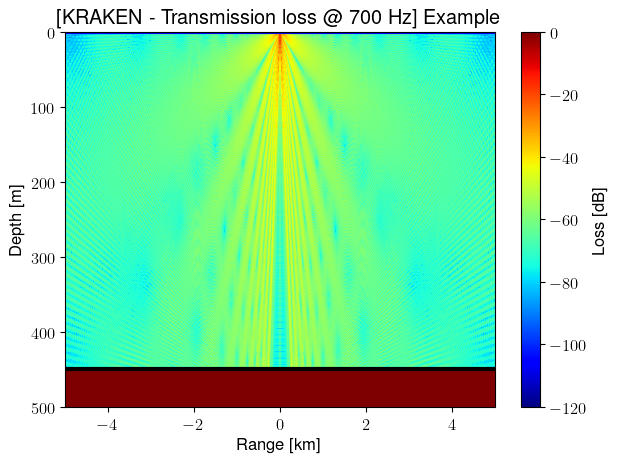

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[KRAKEN - Transmission loss @ 700 Hz] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [9]:
KRAKEN.plot_transmission_loss()